# Proximal Policy Optimization


In [30]:
from google.colab import drive
drive.mount("/RL")

%cd ../RL/MyDrive/RL_PPO

Drive already mounted at /RL; to attempt to forcibly remount, call drive.mount("/RL", force_remount=True).
[Errno 2] No such file or directory: '../RL/MyDrive/RL_PPO'
/RL/MyDrive/RL_PPO


In [ ]:

!pip install swig
!pip install gym[box2d]
!pip install "stable-baselines3[extra]>=2.0.0a4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.7 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376102 sha256=43e2e6155f289331d0af88a5036d751dee4f40885338732921a63666ebcc9782
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.8 MB/s eta 0:00:00
  Installing bu

In [31]:
import gym
from ppo import PPO_ours
import matplotlib.pyplot as plt
import torch
import numpy as np
import seaborn as sns
import stable_baselines3
import os
from utils import load_data_ours, load_data_baseline, add_plot_seed_avg, run_random_policy


%load_ext autoreload
%autoreload 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


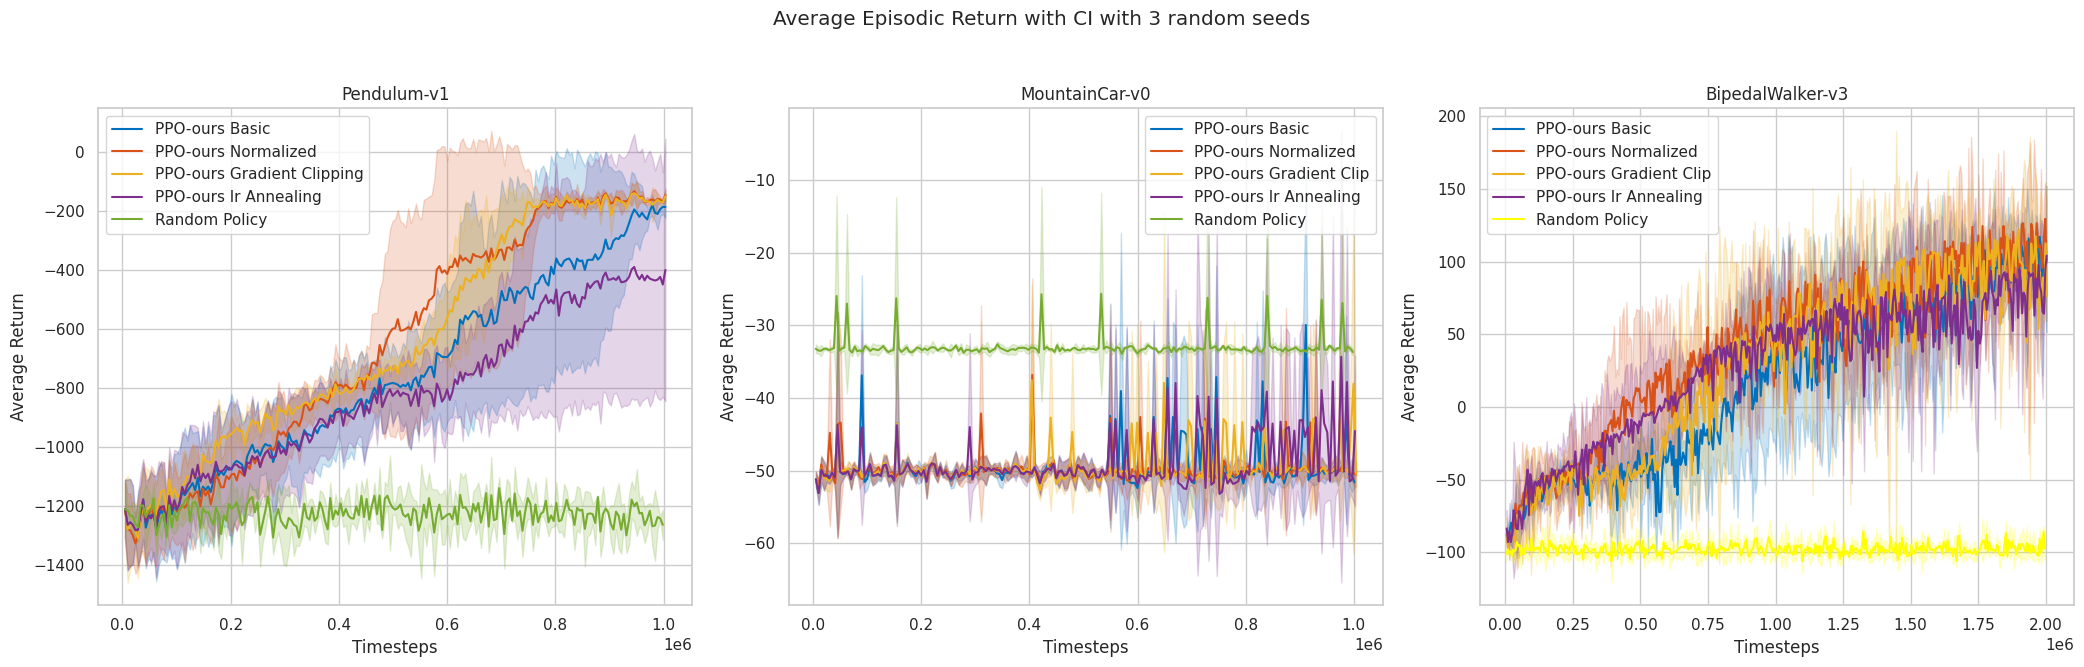

In [ ]:
palette = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E', '#77AC30', '#4DBEEE', '#A2142F']

sns.set(style="whitegrid")

pend_ours_basic = load_data_ours('./seed_data/pendulum/', key='basic')
pend_ours_norm = load_data_ours('./seed_data/pendulum/', key='n_alone')
pend_ours_gc = load_data_ours('./seed_data/pendulum/', key='gc_alone')
pend_ours_lr = load_data_ours('./seed_data/pendulum/', key='lr_alone')
pend_ours_full = load_data_ours('./seed_data/pendulum/', key='full')
# pend_ours_n_er = load_data_ours('./seed_data/pendulum/', key='n_er')
pend_random = load_data_ours('./random_seed_data/pendulum/', key='', random=True)
pend_base = load_data_baseline('./baseline_seed_data/pendulum/')

mcar_ours_basic = load_data_ours('./seed_data/mountaincar/', key='basic')
mcar_ours_norm = load_data_ours('./seed_data/mountaincar/', key='n_alone')
mcar_ours_gc = load_data_ours('./seed_data/mountaincar/', key='gc_alone')
mcar_ours_lr = load_data_ours('./seed_data/mountaincar/', key='lr_alone')
mcar_random = load_data_ours('./random_seed_data/mountaincar/', key='', random=True)
# mcar_base = load_data_baseline('./baseline_seed_data/mountaincar/')

bwalk_ours_basic = load_data_ours('./seed_data/bipedalwalker/', key='basic')
bwalk_ours_norm = load_data_ours('./seed_data/bipedalwalker/', key='n_alone')
bwalk_ours_gc = load_data_ours('./seed_data/bipedalwalker/', key='gc_alone')
bwalk_ours_lr = load_data_ours('./seed_data/bipedalwalker/', key='lr_alone')
bwalk_random = load_data_ours('./random_seed_data/bipedalwalker/', key='', random=True)
# mcar_base = load_data_baseline('./baseline_seed_data/mountaincar/')

plt.figure(figsize=(21, 7))
plt.suptitle(f"Average Episodic Return with CI with {pend_ours_norm['avg_ep_ret'].shape[0]} random seeds")

ax1 = plt.subplot(131)

add_plot_seed_avg(pend_ours_basic['avg_ep_ret'], pend_ours_basic['timesteps'].iloc[0], color=palette[0], label='PPO-ours Basic')
add_plot_seed_avg(pend_ours_norm['avg_ep_ret'], pend_ours_norm['timesteps'].iloc[0], color=palette[1], label='PPO-ours Normalized')
add_plot_seed_avg(pend_ours_gc['avg_ep_ret'], pend_ours_gc['timesteps'].iloc[0], color=palette[2], label='PPO-ours Gradient Clipping')
add_plot_seed_avg(pend_ours_lr['avg_ep_ret'], pend_ours_lr['timesteps'].iloc[0], color=palette[3], label='PPO-ours lr Annealing')
# add_plot_seed_avg(data_ours_full['avg_ep_ret'], data_ours_full['timesteps'].iloc[0], color='red', label='PPO-ours Full')
# add_plot_seed_avg(pend_base['avg_ep_ret'], pend_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines')
add_plot_seed_avg(pend_random['avg_ep_ret'], pend_random['timesteps'].iloc[0], color=palette[4], label='Random Policy')
# add_plot_seed_avg(data_ours_n_er['avg_ep_ret'], data_ours_n_er['timesteps'].iloc[0], color='lightblue', label='PPO-ours Norm. Entropy Reg')
ax1.set_title("Pendulum-v1")
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Average Return')
ax1.legend()


ax2 = plt.subplot(132)

add_plot_seed_avg(mcar_ours_basic['avg_ep_ret'], mcar_ours_basic['timesteps'].iloc[0], color=palette[0], label='PPO-ours Basic')
add_plot_seed_avg(mcar_ours_norm['avg_ep_ret'], mcar_ours_norm['timesteps'].iloc[0], color=palette[1], label='PPO-ours Normalized')
add_plot_seed_avg(mcar_ours_gc['avg_ep_ret'], mcar_ours_gc['timesteps'].iloc[0], color=palette[2], label='PPO-ours Gradient Clip')
add_plot_seed_avg(mcar_ours_lr['avg_ep_ret'], mcar_ours_lr['timesteps'].iloc[0], color=palette[3], label='PPO-ours lr Annealing')
# add_plot_seed_avg(data_ours_full['avg_ep_ret'], data_ours_full['timesteps'].iloc[0], color='red', label='PPO-ours Full')
# add_plot_seed_avg(mcar_base['avg_ep_ret'], mcar_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines')
add_plot_seed_avg(mcar_random['avg_ep_ret'], mcar_random['timesteps'].iloc[0], color=palette[4], label='Random Policy')
# add_plot_seed_avg(data_ours_n_er['avg_ep_ret'], data_ours_n_er['timesteps'].iloc[0], color='lightblue', label='PPO-ours Norm. Entropy Reg')
ax2.set_title("MountainCar-v0")
ax2.set_xlabel('Timesteps')
ax2.set_ylabel('Average Return')
ax2.legend()


ax3 = plt.subplot(133)

add_plot_seed_avg(bwalk_ours_basic['avg_ep_ret'], bwalk_ours_basic['timesteps'].iloc[0], color=palette[0], label='PPO-ours Basic')
add_plot_seed_avg(bwalk_ours_norm['avg_ep_ret'], bwalk_ours_norm['timesteps'].iloc[0], color=palette[1], label='PPO-ours Normalized')
add_plot_seed_avg(bwalk_ours_gc['avg_ep_ret'], bwalk_ours_gc['timesteps'].iloc[0], color=palette[2], label='PPO-ours Gradient Clip')
add_plot_seed_avg(bwalk_ours_lr['avg_ep_ret'], bwalk_ours_lr['timesteps'].iloc[0], color=palette[3], label='PPO-ours lr Annealing')
# add_plot_seed_avg(data_ours_full['avg_ep_ret'], data_ours_full['timesteps'].iloc[0], color='red', label='PPO-ours Full')
# add_plot_seed_avg(data_base['avg_ep_ret'], data_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines')
add_plot_seed_avg(bwalk_random['avg_ep_ret'], bwalk_random['timesteps'].iloc[0], color='yellow', label='Random Policy')
# add_plot_seed_avg(data_ours_n_er['avg_ep_ret'], data_ours_n_er['timesteps'].iloc[0], color='lightblue', label='PPO-ours Norm. Entropy Reg')
ax3.set_title("BipedalWalker-v3")
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Average Return')
ax3.legend()

# plt.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [37]:
import json
# print(os.listdir('./random_seed_data/mountaincar/'))

# Define the constant to subtract
constant_to_subtract = 22

# Read the JSON data from the file
with open('./random_seed_data/mountaincar/data_1.json', 'r') as file:
    data = file.read().splitlines()

# Process each JSON object
updated_data = []
for json_str in data:
    # Convert string to dictionary
    json_dict = json.loads(json_str)

    # Subtract the constant from avg_ep_ret
    json_dict['avg_ep_ret'] -= constant_to_subtract

    # Add the updated dictionary to the list
    updated_data.append(json_dict)

# Write the updated JSON objects to a new file
with open('./random_seed_data/mountaincar/data_1', 'w') as file:
    for item in updated_data:
        # Convert dictionary to JSON string and write to file
        json_str = json.dumps(item)
        file.write(json_str + '\n')

['data_1', 'data_42', 'data_123']


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [ ]:
seeds = [1, 42, 123]
for seed in seeds:
  env = gym.make('Pendulum-v1')
  ppo = PPO_ours(env, seed=seed, ipynb=True, name='pendulum', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
  ppo.learn(1_000_000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

**************************************************
Starting training for pendulum (seed = 1)...
Running PPO for 1000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 209.0
**************************************************
Iteration 10/209
Iteration 20/209
Iteration 30/209
Iteration 40/209
Iteration 50/209
Iteration 60/209
Iteration 70/209
Iteration 80/209
Iteration 90/209
Iteration 100/209
Iteration 110/209
Iteration 120/209
Iteration 130/209
Iteration 140/209
Iteration 150/209
Iteration 160/209
Iteration 170/209
Iteration 180/209
Iteration 190/209
Iteration 200/209
**************************************************
Starting training for pendulum (seed = 42)...
Running PPO for 1000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 209.0
**************************************************
Iteration 10/209
Iteration 20/209
Iteration 30/209
Iteration 40/209
Iteration 50/209
Iteration 60/209
Iteration 70/209
Itera

In [ ]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.logger import configure
from stable_baselines3 import PPO

path = './baseline_seed_data_/mountaincar/'
seeds = [1, 42, 123]
envs = ['Pendulum-v1', 'MountainCarContinuous-v0', 'BipedalWalker-v3']

for seed in seeds:
    hyperparameters = {'n_steps': 2048, 'gamma': 0.99, 'ent_coef': 0.0, 'learning_rate': 3e-4, 'verbose': 1, 'seed': seed}

    new_logger = configure(path, ["stdout", "log"])


    env = make_vec_env(envs[1], n_envs=1)
    model = PPO('MlpPolicy', env, **hyperparameters)
    model.set_logger(new_logger)
    model.learn(10_000)

    os.rename(path + 'log.txt', path + f'seed_{seed}')

In [ ]:
seeds = [1, 42, 123]
for seed in seeds:
  env = gym.make('MountainCarContinuous-v0')
  ppo = PPO_ours(env, seed=seed, ipynb=True, name='mountaincar', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
  ppo.learn(1_000_000)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


**************************************************
Starting training for mountaincar (seed = 1)...
Running PPO for 1000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 209.0
**************************************************
Iteration 5/209
Iteration 10/209
Iteration 15/209
Iteration 20/209
Iteration 25/209
Iteration 30/209
Iteration 35/209
Iteration 40/209
Iteration 45/209
Iteration 50/209
Iteration 55/209
Iteration 60/209
Iteration 65/209
Iteration 70/209
Iteration 75/209
Iteration 80/209
Iteration 85/209
Iteration 90/209
Iteration 95/209
Iteration 100/209
Iteration 105/209
Iteration 110/209
Iteration 115/209
Iteration 120/209
Iteration 125/209
Iteration 130/209
Iteration 135/209
Iteration 140/209
Iteration 145/209
Iteration 150/209
Iteration 155/209
Iteration 160/209
Iteration 165/209
Iteration 170/209
Iteration 175/209
Iteration 180/209
Iteration 185/209
Iteration 190/209
Iteration 195/209
**************************************************
St

In [ ]:
seeds = [1, 42, 123]

for seed in seeds:
  env = gym.make('BipedalWalker-v3')
  ppo = PPO_ours(env, seed=seed, ipynb=True, name='bipedalwalker', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
  ppo.learn(2_000_000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

**************************************************
Starting training for bipedalwalker (seed = 42)...
Running PPO for 2000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 417.0
**************************************************
Iteration 10/417
Iteration 20/417
Iteration 30/417
Iteration 40/417
Iteration 50/417
Iteration 60/417
Iteration 70/417
Iteration 80/417
Iteration 90/417
Iteration 100/417
Iteration 110/417
Iteration 120/417
Iteration 130/417
Iteration 140/417
Iteration 150/417
Iteration 160/417
Iteration 170/417
Iteration 180/417
Iteration 190/417
Iteration 200/417
Iteration 210/417
Iteration 220/417
Iteration 230/417
Iteration 240/417
Iteration 250/417
Iteration 260/417
Iteration 270/417
Iteration 280/417
Iteration 290/417
Iteration 300/417
Iteration 310/417
Iteration 320/417
Iteration 330/417
Iteration 340/417
Iteration 350/417
Iteration 360/417
Iteration 370/417
Iteration 380/417
Iteration 390/417


In [ ]:
seeds = [123]
for seed in seeds:
  env = gym.make('BipedalWalker-v3')
  for i in range(3):
    print(f"{i = }")
    if i == 0:
      print("Norm")
      ppo = PPO_ours(env, seed=seed, ipynb=True, name='bipedalwalker', verbose='light', device=device, adv_norm=True, grad_clip=False, entropy_reg=False, lr_annealing=False)
    if i == 1:
      print("Grad Clip")
      ppo = PPO_ours(env, seed=seed, ipynb=True, name='bipedalwalker', verbose='light', device=device, adv_norm=False, grad_clip=True, entropy_reg=False, lr_annealing=False)
    if i == 2:
      print("Anneal")
      ppo = PPO_ours(env, seed=seed, ipynb=True, name='bipedalwalker', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
    ppo.learn(2_000_000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

i = 0
Norm
**************************************************
Starting training for bipedalwalker (seed = 1)...
Running PPO for 2000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 417.0
**************************************************
Iteration 10/417
Iteration 20/417
Iteration 30/417
Iteration 40/417
Iteration 50/417
Iteration 60/417
Iteration 70/417
Iteration 80/417
Iteration 90/417
Iteration 100/417
Iteration 110/417
Iteration 120/417
Iteration 130/417
Iteration 140/417
Iteration 150/417
Iteration 160/417
Iteration 170/417
Iteration 180/417
Iteration 190/417
Iteration 200/417
Iteration 210/417
Iteration 220/417
Iteration 230/417
Iteration 240/417
Iteration 250/417
Iteration 260/417
Iteration 270/417
Iteration 280/417
Iteration 290/417
Iteration 300/417
Iteration 310/417
Iteration 320/417
Iteration 330/417
Iteration 340/417
Iteration 350/417
Iteration 360/417
Iteration 370/417
Iteration 380/417
i = 1
Grad Clip
*******************************

In [ ]:
num_timesteps = [1_000_000, 1_000_000, 2_000_000]
batch_size = 4800
seeds = [1, 42, 123]

for seed in seeds:
    run_random_policy('Pendulum-v1', num_timesteps[0], batch_size, seed, name='pendulum')
    run_random_policy('MountainCarContinuous-v0', num_timesteps[1], batch_size, seed, name='mountaincar')
    run_random_policy('BipedalWalker-v3', num_timesteps[2], batch_size, seed, name='bipedalwalker')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


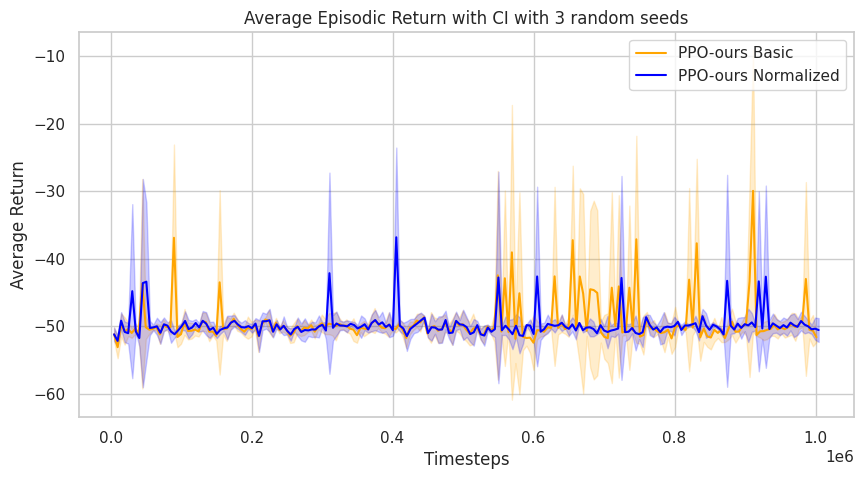

In [ ]:
data_ours = load_data_ours('./seed_data/mountaincar/', key='basic')
data_ours_norm = load_data_ours('./seed_data/mountaincar/', key='n_alone')
# data_ours_full = load_data_ours('./seed_data/mountaincar/', key='full')
# data_ours_n_er = load_data_ours('./seed_data/mountaincar/', key='n_er')
# data_base = load_data_baseline('./baseline_seed_data/mountaincar/')

plt.figure(figsize=(10, 5))

add_plot_seed_avg(data_ours['avg_ep_ret'], data_ours['timesteps'].iloc[0], color='orange', label='PPO-ours Basic')
add_plot_seed_avg(data_ours_norm['avg_ep_ret'], data_ours_norm['timesteps'].iloc[0], color='blue', label='PPO-ours Normalized')
# add_plot_seed_avg(data_ours_full['avg_ep_ret'], data_ours_full['timesteps'].iloc[0], color='red', label='PPO-ours Full')
# add_plot_seed_avg(data_base['avg_ep_ret'], data_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines')
# add_plot_seed_avg(data_ours_n_er['avg_ep_ret'], data_ours_n_er['timesteps'].iloc[0], color='lightblue', label='PPO-ours Norm. Entropy Reg')
plt.title(f"Average Episodic Return with CI with {data_ours_norm['avg_ep_ret'].shape[0]} random seeds")
plt.xlabel('Timesteps')
plt.ylabel('Average Return')
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.